# 实验一 图像基本操作及点处理
### 一、实验目的
1.	掌握读、写图像的基本方法；
2.	掌握PYTHON语言中图像数据与信息的读取方法；
3.	理解图像灰度变换处理在图像增强的作用；
4.	掌握绘制灰度直方图的方法，理解灰度直方图的灰度变换及均衡化的方法。；
5.	掌握基于华为ModelArts开发环境的数字图像处理基本操作。

### 二、实验内容与要求

熟悉Python语言中对图像数据读取，显示等基本函数。
1.	将目录下work文件夹中的"lena_ill.png"文件读出。用到图像数据读取，显示等函数，观察一下图像数据，将这个图像显示出来。读入不同情况的图像，请自己编程和调用Python函数用常用灰度变换函数对输入图像进行灰度变换，比较相应的处理效果，感受图像灰度变换处理在图像增强的作用。

(512, 512, 3)


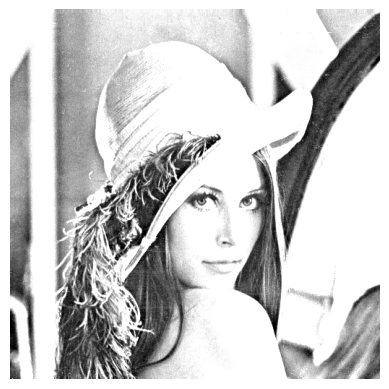

In [1]:
# 填入代码，并展示运行结果
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

img=cv2.imread("./work/lena_ill.png")

img_color=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_color.shape)
img_gray = (img_color@[0.299,0.587,0.114]).astype(np.uint8)
#plt.imshow(img_color)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')  
plt.show()

2.	绘制图像灰度直方图的方法，对图像进行均衡化处理
将Python目录下work文件夹中的图像文件读出，用rgb2gray()将其转化为灰度图像，记为变量B。请自己编程和调用Python函数完成如下实验。

- 1）	显示B的图像及灰度直方图，可以发现其灰度值集中在一段区域，用函数将它的灰度值调整到[0, 1]之间，并观察调整后的图像与原图像的差别，调整后的灰度直方图与原灰度直方图的区别。


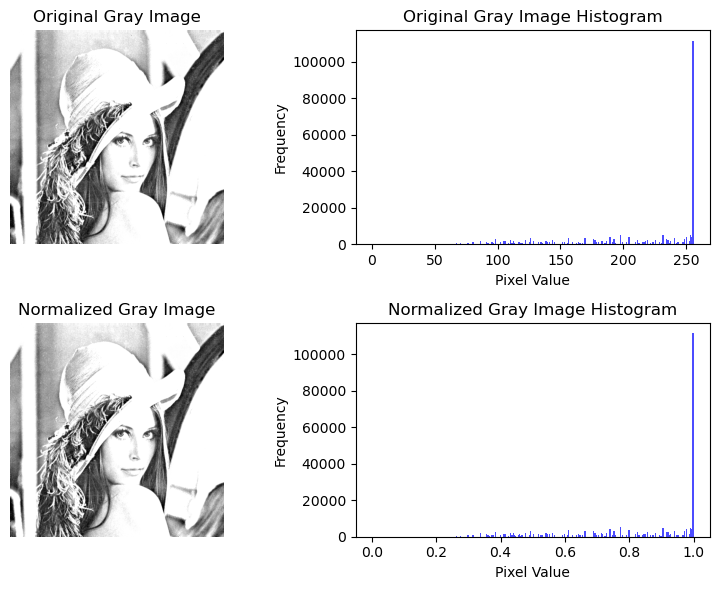

In [2]:
# 填入代码，并展示运行结果
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像文件
img = cv2.imread('work/lena_ill.png')

# 将彩色图像转换为灰度图像
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 显示灰度图像
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

# 绘制原灰度图像的直方图
plt.subplot(2, 2, 2)
plt.hist(gray_img.flatten(), bins=256, range=[0, 256], color='b', alpha=0.7)
plt.title('Original Gray Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# 将灰度值缩放到[0, 1]之间
normalized_img = gray_img / 255.0

# 显示调整后的灰度图像
plt.subplot(2, 2, 3)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Gray Image')
plt.axis('off')

# 绘制调整后灰度图像的直方图
plt.subplot(2, 2, 4)
plt.hist(normalized_img.flatten(), bins=256, range=[0, 1], color='b', alpha=0.7)
plt.title('Normalized Gray Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- 2）	对B进行直方图均衡化处理，试比较与原图的异同。

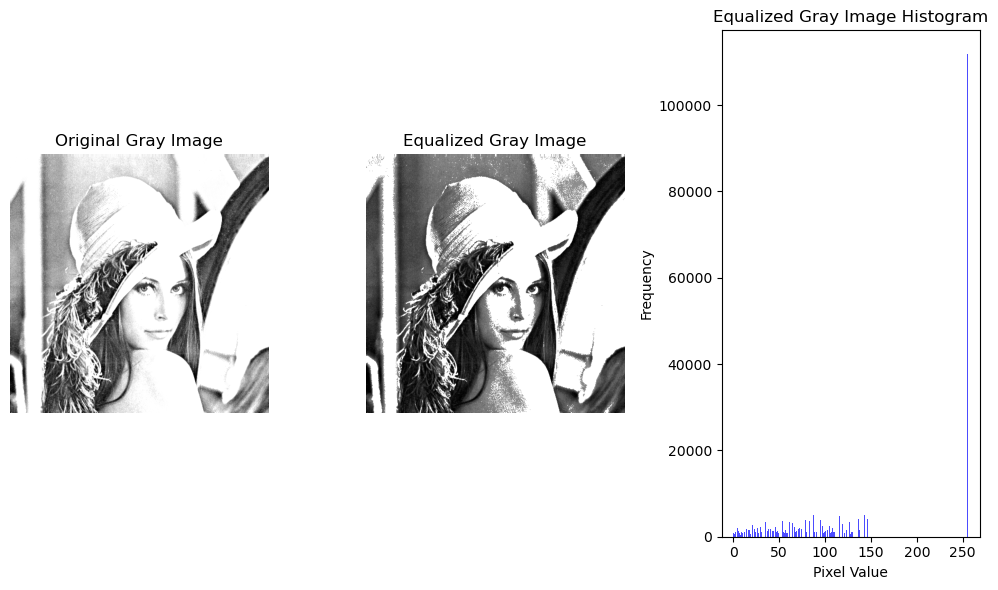

In [3]:
# 填入代码，并展示运行结果
equalized_img = cv2.equalizeHist(gray_img)

# 显示直方图均衡化后的灰度图像
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Gray Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Gray Image')
plt.axis('off')

# 绘制直方图均衡化后的灰度图像的直方图
plt.subplot(1, 3, 3)
plt.hist(equalized_img.flatten(), bins=256, range=[0, 256], color='b', alpha=0.7)
plt.title('Equalized Gray Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

3.	使用Python语言对图像进行平移、旋转。

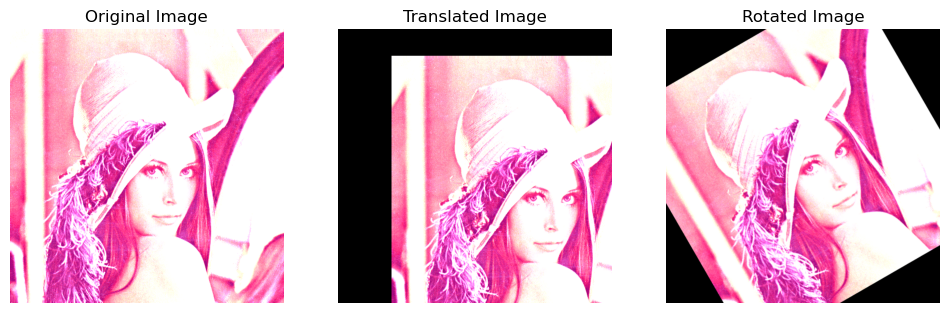

In [4]:
# 填入代码，并展示运行结果
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像文件
img = cv2.imread('work/lena_ill.png')

# 获取图像的高度和宽度
height, width = img.shape[:2]

# 定义平移矩阵，向右平移100个像素，向下平移50个像素
M_translation = np.float32([[1, 0, 100], [0, 1, 50]])

# 对图像进行平移
translated_img = cv2.warpAffine(img, M_translation, (width, height))

# 定义旋转矩阵，绕图像中心逆时针旋转30度
M_rotation = cv2.getRotationMatrix2D((width/2, height/2), 30, 1)

# 对图像进行旋转
rotated_img = cv2.warpAffine(img, M_rotation, (width, height))

# 显示原始图像、平移后的图像和旋转后的图像
plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.axis('off')
plt.subplot(132), plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB)), plt.title('Translated Image')
plt.axis('off')
plt.subplot(133), plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)), plt.title('Rotated Image')
plt.axis('off')
plt.show()

4.	两幅图像("img_a.png", "img_b.png")直方图是否相同，白色的为像素值1，黑色的为像素值0，当用3*3的均值滤波器滤波后（边界像素的处理采用拓展的方式，其白色的部分拓展为1，黑色的部分拓展为0），是否滤波后直方图也相同？简单解释原因，并且给出对左边图像进行滤波后图像各个灰度级。


<div align=center>
<img src="./work/ex1.png"/>
</div>

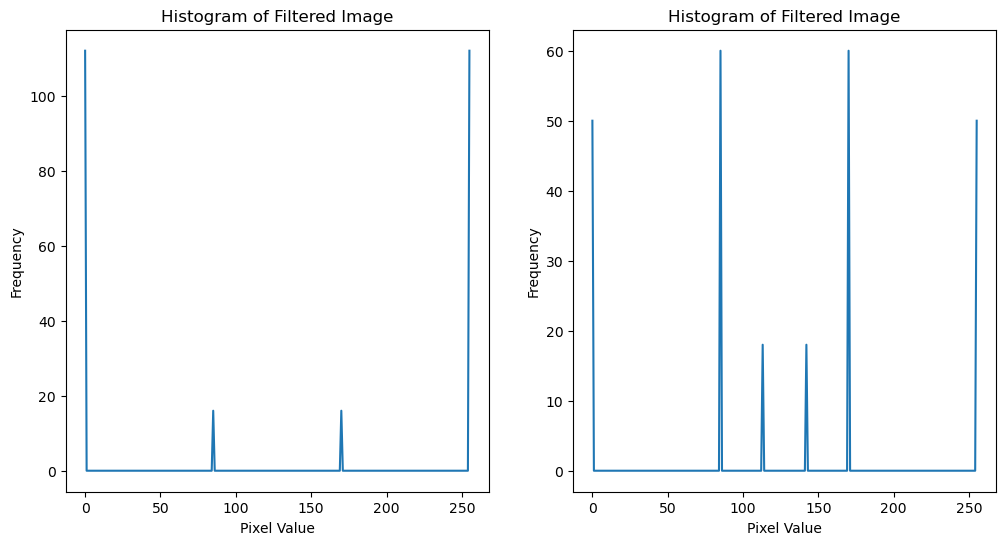

In [1]:
# 填入代码，并展示运行结果
import cv2  
import numpy as np  
import matplotlib.pyplot as plt  
  
# 读取左边图像，确保文件路径正确  
img_left = cv2.imread('./work/img_a.png', cv2.IMREAD_GRAYSCALE)  
img_right=  cv2.imread('./work/img_b.png', cv2.IMREAD_GRAYSCALE)  
# 检查图像是否成功读取  
if img_left is None or img_right is None:  
    print("Error: Could not read the image.")  
else:  
    # 定义3x3均值滤波器  
    kernel = np.ones((3, 3), np.float32) / 9  
  
    # 对左边图像进行均值滤波  
    filtered_img1 = cv2.filter2D(img_left, -1, kernel)  
    filtered_img2 = cv2.filter2D(img_right, -1, kernel)  
    # 计算滤波后图像的直方图  
    hist_filtered_img1 = cv2.calcHist([filtered_img1], [0], None, [256], [0, 256])  
    hist_filtered_img2 = cv2.calcHist([filtered_img2], [0], None, [256], [0, 256]) 
    # 显示滤波前后的图像和直方图  
    plt.figure(figsize=(12, 6))  
  
    plt.subplot(121), plt.plot(hist_filtered_img1), plt.title('Histogram of Filtered Image')  
    plt.xlabel('Pixel Value')  
    plt.ylabel('Frequency')  
    plt.subplot(122), plt.plot(hist_filtered_img2), plt.title('Histogram of Filtered Image')  
    plt.xlabel('Pixel Value')  
    plt.ylabel('Frequency')
    plt.show()

5.	(a)画出原图像的直方图；(b)利用直方图均衡方法求出均衡化后新图像的直方图；(c)求出均衡化的图像。

$$
\begin{array}{|c|c|c|c|c|}
\hline
3 & 3 & 0 & 0 & 1\\
\hline
3 & 3 & 1 & 1 & 4\\
\hline
3 & 3 & 2 & 1 & 1\\
\hline
3 & 3 & 2 & 4 & 1\\
\hline
2 & 2 & 1 & 1 & 4\\
\hline
\end{array}
$$

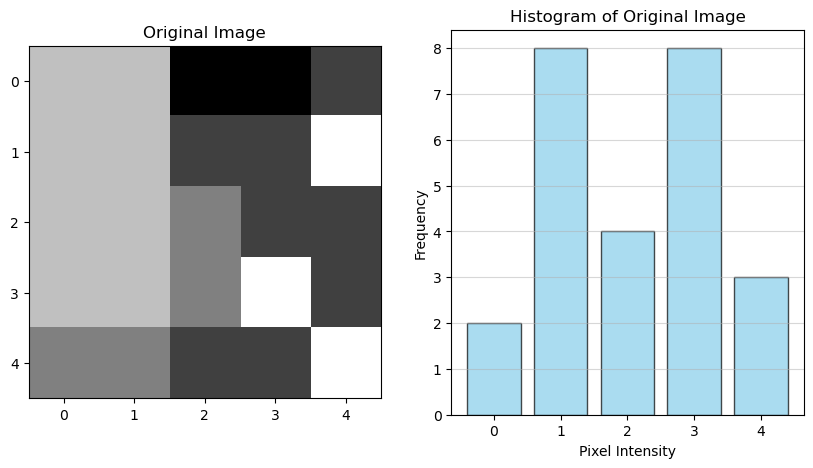

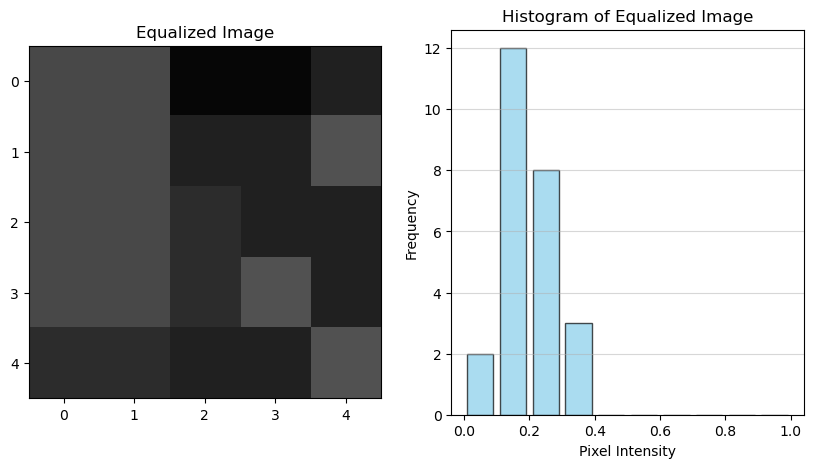

In [2]:
# 填入代码，并展示运行结果
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像文件
img = np.array([[3,3,0,0,1],[3,3,1,1,4],[3,3,2,1,1],[3,3,2,4,1],[2,2,1,1,4]])

# (a) 绘制原图像的直方图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=4)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.hist(img.ravel(), bins=np.arange(6)-0.5, rwidth=0.8, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xticks(np.arange(5))
plt.grid(axis='y', alpha=0.5)
plt.show()

# (b) 直方图均衡化
hist, bins = np.histogram(img.flatten(), bins=np.arange(6), density=True)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
equalized_img = np.interp(img.flatten(), bins[:-1], cdf_normalized)

# 将一维数组转换回原始形状
equalized_img = equalized_img.reshape(img.shape)

# 绘制均衡化后的直方图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(equalized_img, cmap='gray', vmin=0, vmax=1)
plt.title('Equalized Image')
plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), bins=np.linspace(0, 1, num=11), rwidth=0.8, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()
